In [1]:
pip install pyforest

In [2]:
import pyforest
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
haberman=pd.read_csv("/content/haberman.csv",header=None)##( we can observe that there are no column names specified in the CSV file. In this case,
## Pandas automatically takes the first row of the data set as column names.
##To tell Pandas not to take the first row as column names, specify ‘header=None’ option while loading the data set)
haberman


<IPython.core.display.Javascript object>

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [3]:
column_names = ['Age', 'Year', 'Positive_Axillary_Nodes', 'Survival_Status']
haberman.columns = column_names
haberman

,Age,Year,Positive_Axillary_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [4]:
haberman["Survival_Status"].value_counts()

1    225
2     81
Name: Survival_Status, dtype: int64

In [5]:
haberman.describe()

,Age,Year,Positive_Axillary_Nodes,Survival_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


The age of the patients vary from 30 to 83 with the median of 52.
Although the maximum number of positive axillary nodes observed is 52, nearly 75% of the patients have less than 5 positive axillary nodes and nearly 25% of the patients have no positive axillary nodes
The dataset contains only a small number of records (306)

In [6]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      306 non-null    int64
 1   Year                     306 non-null    int64
 2   Positive_Axillary_Nodes  306 non-null    int64
 3   Survival_Status          306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [7]:
# percentage of classes
# this gives us the distribution of classes in the data set
haberman["Survival_Status"].value_counts(1)


1    0.735294
2    0.264706
Name: Survival_Status, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

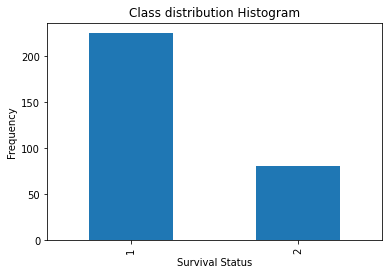

In [8]:
# plot the histogram for the classes - binary classification, only two classes
count_classes = pd.value_counts(haberman["Survival_Status"])
count_classes.plot(kind = 'bar')
plt.title("Class distribution Histogram")
plt.xlabel("Survival Status")
plt.ylabel("Frequency")
plt.show()

#Univariate Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

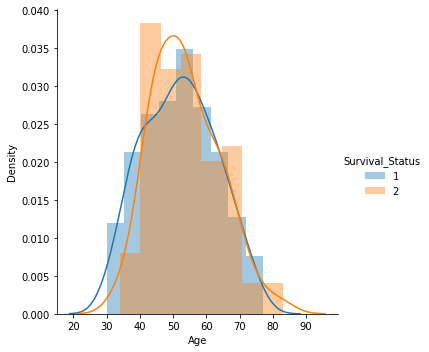

In [9]:
#Univariate analysis - plotting distribution
sns.FacetGrid(haberman, hue="Survival_Status", size=5) \
      .map(sns.distplot, "Age") \
      .add_legend();
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

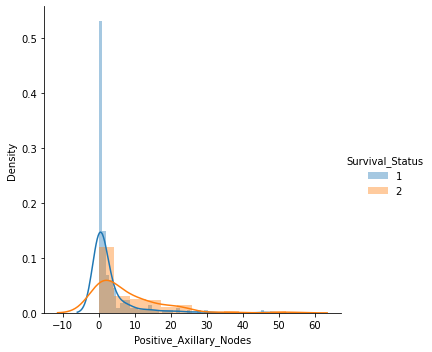

In [10]:
#Univariate analysis - plotting distribution
sns.FacetGrid(haberman, hue="Survival_Status", size=5) \
      .map(sns.distplot,"Positive_Axillary_Nodes") \
      .add_legend();
plt.show()

Distribution plots are used to visually assess how the data points are distributed with respect to its frequency.
Usually the data points are grouped into bins and the height of the bars representing each group increases with increase in the number of data points lie within that group. (histogram)
Probability Density Function (PDF) is the probability that the variable takes a value x. (smoothed version of the histogram)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********* Age *********


<IPython.core.display.Javascript object>

Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]


<IPython.core.display.Javascript object>

CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********* Year *********


<IPython.core.display.Javascript object>

Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]


<IPython.core.display.Javascript object>

CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

********* Positive_Axillary_Nodes *********


<IPython.core.display.Javascript object>

Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]


<IPython.core.display.Javascript object>

CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

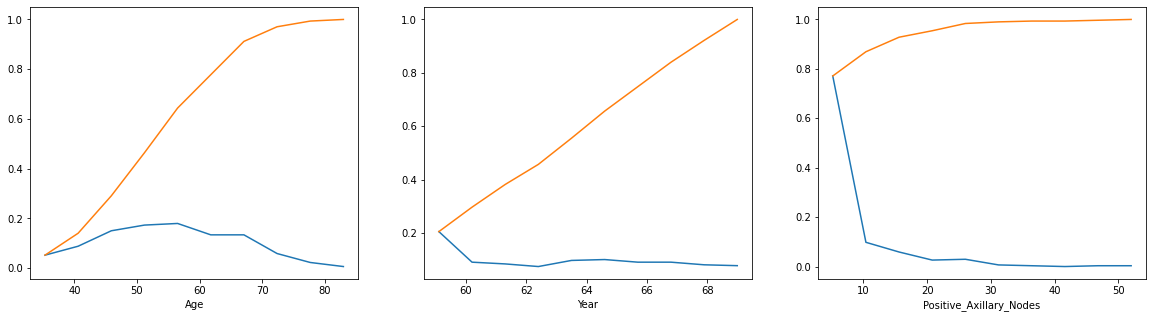

In [11]:
# CDF - The cumulative distribution function (cdf) is the probability that 
# the variable takes a value less than or equal to x.
plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(haberman.columns)[:-1]):#The built-in enumerate() function allows you to loop over a list of items while keeping track
#of the index value in a separate variable
    
    plt.subplot(1, 3, idx+1)
    print("********* "+feature+" *********")
    ## calculate histogram
    counts,bin_edges = np.histogram(haberman[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))#The code  will print the bin specs in a readable format via terminal.
    
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)#  """ This function returns the cumulative sum of bin_counts.
    print("CDF: {}".format(cdf))
    
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)

In the above plots, the blue line indicates PDF. The orange line indicates CDF for all data points.
From the PDF plot, we can see that almost 80% of the patients have positive lymph nodes less than 10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

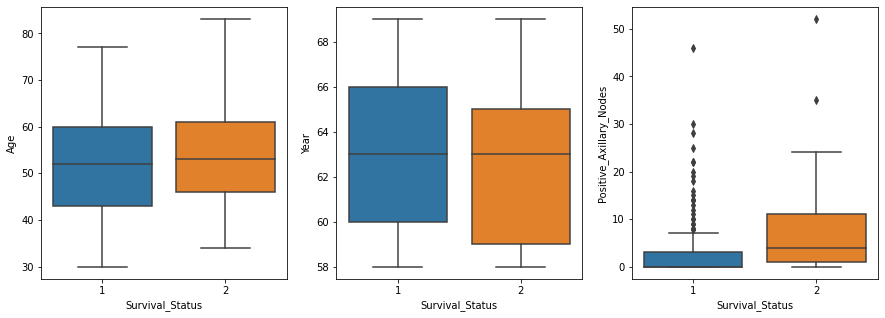

In [12]:
# box plot for all independent variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    sns.boxplot( x='Survival_Status', y = feature, 
                 data=haberman, ax=axes[idx])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

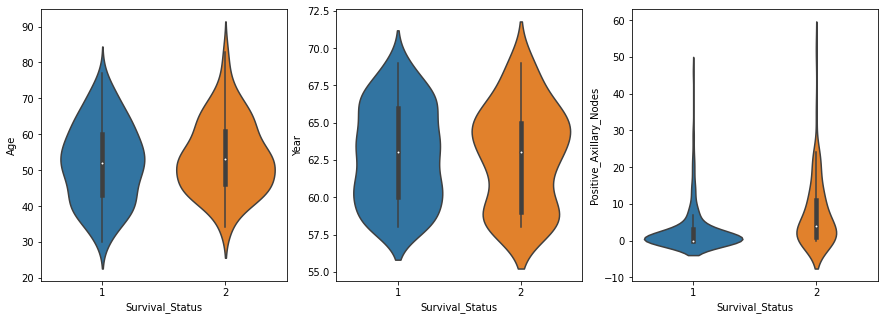

In [13]:
#violin plot for all independent variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    sns.violinplot( x='Survival_Status', y=feature, 
                    data=haberman, ax=axes[idx])
plt.show()

Observation: The patients treated after 1966 have the slightly higher chance to survive that the rest. The patients treated before 1959 have the slightly lower chance to survive that the rest.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

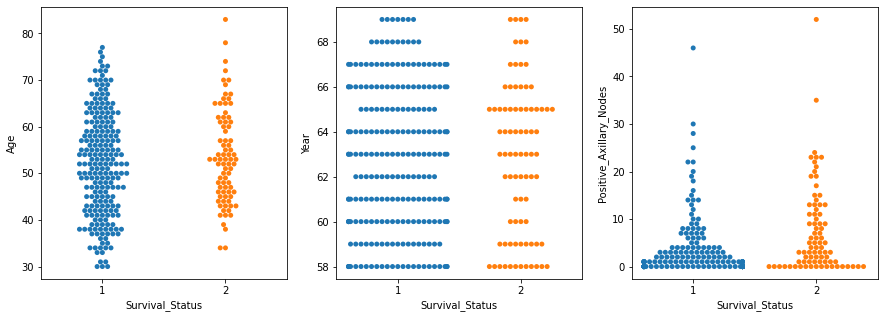

In [14]:
# swarm plot for all independent variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    sns.swarmplot( x='Survival_Status', y=feature, 
                   data=haberman, ax=axes[idx])
plt.show()

From the above plot, we can observe that, as the patient year of operation is the latest, survival is little better

#Multivariate Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

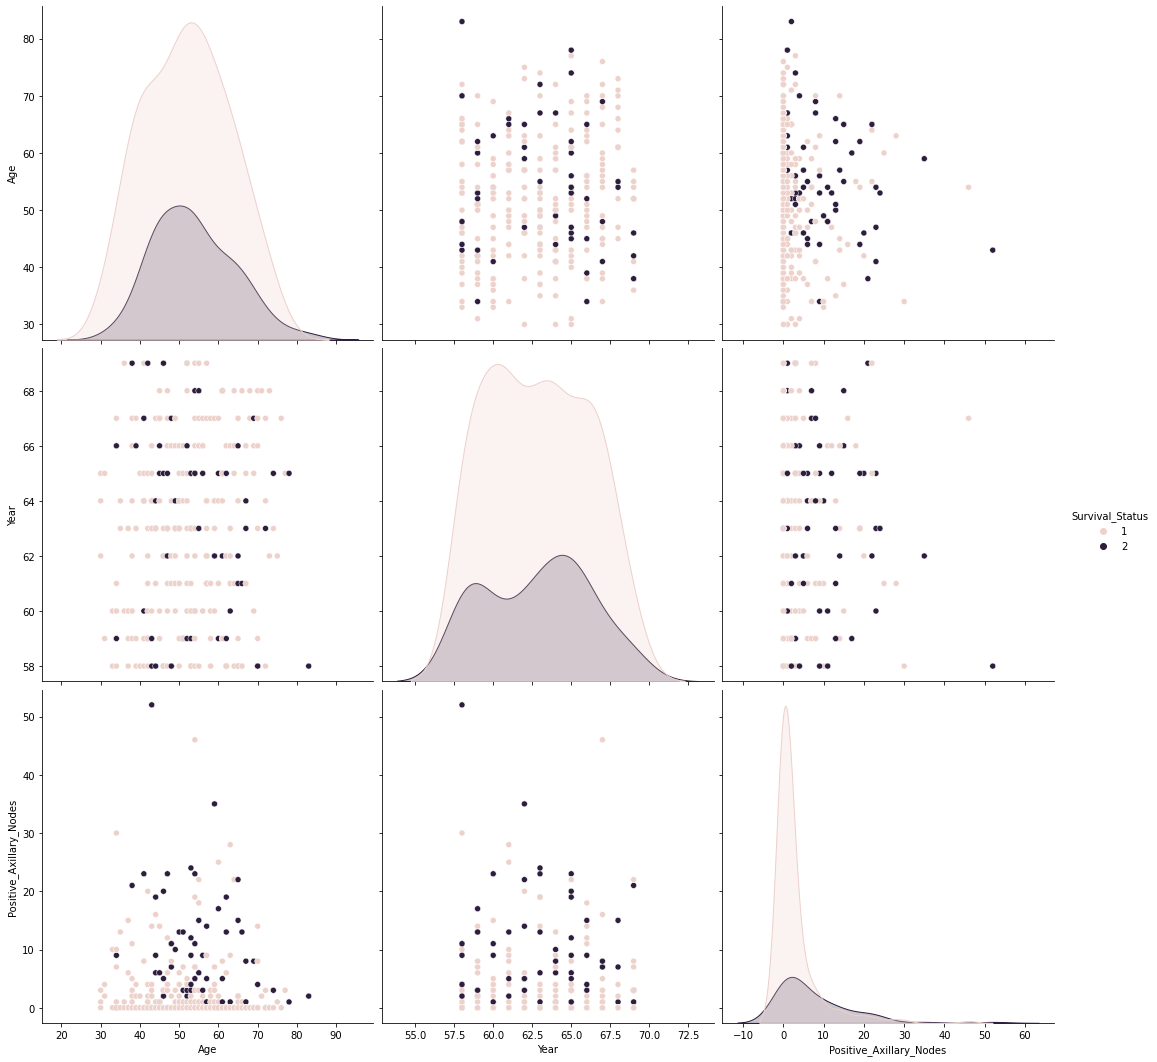

In [15]:
sns.pairplot(haberman, hue = 'Survival_Status', size = 5)
plt.show()

By scattering the data points between Year of treatment and Positive Axillary Nodes, we can see the better separation between the two classes than other scatter plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

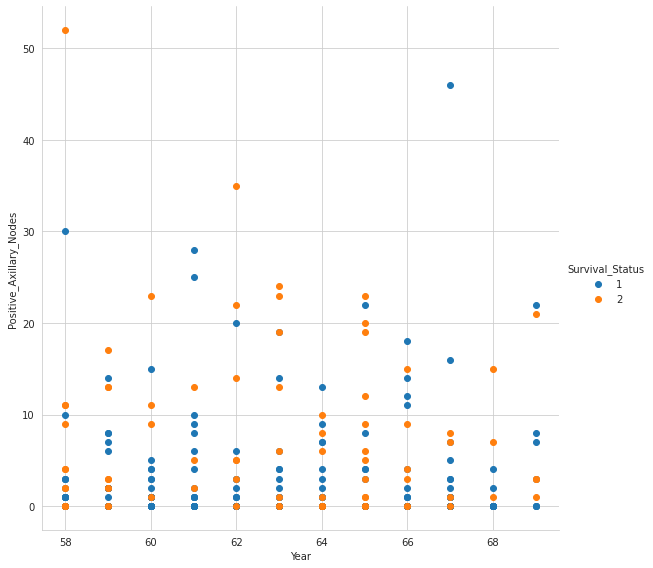

In [16]:
# 2-D Scatter plot with color-coding for each Survival type/class.
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survival_Status", size=8) \
   .map(plt.scatter, "Year", "Positive_Axillary_Nodes") \
   .add_legend();
plt.show()

<IPython.core.display.Javascript object>

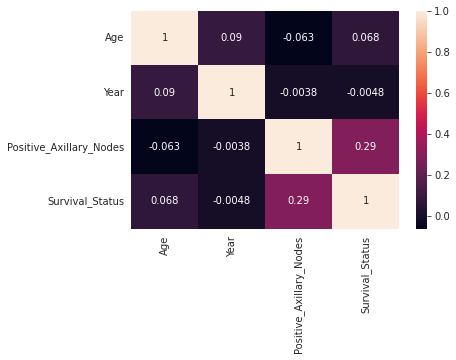

In [17]:
# the heatmap of the correlation matrix of our dataset
sns.heatmap(haberman.corr(), annot = True)

Here we can see the  higher correlation between positive axillary_nodes and survival_status

In [18]:
x = haberman.iloc[:,0:3].values
y = haberman.iloc[:,3].values
print(x)
print(y)

[[30 64  1]
 [30 62  3]
 [30 65  0]
 [31 59  2]
 [31 65  4]
 [33 58 10]
 [33 60  0]
 [34 59  0]
 [34 66  9]
 [34 58 30]
 [34 60  1]
 [34 61 10]
 [34 67  7]
 [34 60  0]
 [35 64 13]
 [35 63  0]
 [36 60  1]
 [36 69  0]
 [37 60  0]
 [37 63  0]
 [37 58  0]
 [37 59  6]
 [37 60 15]
 [37 63  0]
 [38 69 21]
 [38 59  2]
 [38 60  0]
 [38 60  0]
 [38 62  3]
 [38 64  1]
 [38 66  0]
 [38 66 11]
 [38 60  1]
 [38 67  5]
 [39 66  0]
 [39 63  0]
 [39 67  0]
 [39 58  0]
 [39 59  2]
 [39 63  4]
 [40 58  2]
 [40 58  0]
 [40 65  0]
 [41 60 23]
 [41 64  0]
 [41 67  0]
 [41 58  0]
 [41 59  8]
 [41 59  0]
 [41 64  0]
 [41 69  8]
 [41 65  0]
 [41 65  0]
 [42 69  1]
 [42 59  0]
 [42 58  0]
 [42 60  1]
 [42 59  2]
 [42 61  4]
 [42 62 20]
 [42 65  0]
 [42 63  1]
 [43 58 52]
 [43 59  2]
 [43 64  0]
 [43 64  0]
 [43 63 14]
 [43 64  2]
 [43 64  3]
 [43 60  0]
 [43 63  2]
 [43 65  0]
 [43 66  4]
 [44 64  6]
 [44 58  9]
 [44 63 19]
 [44 61  0]
 [44 63  1]
 [44 61  0]
 [44 67 16]
 [45 65  6]
 [45 66  0]
 [45 67  1]
 [45

In [19]:
x.shape

(306, 3)

In [20]:
y.shape

(306,)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [22]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((214, 3), (92, 3), (214,), (92,))

#KNN ALGORITHM

In [23]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
y_pred=neigh.predict(x_test)
print('The accuracy of the KNN for test data',metrics.accuracy_score(y_pred,y_test))
y_pred_train=neigh.predict(x_train)
print('The accuracy of the KNN for train data',metrics.accuracy_score(y_pred_train,y_train))

<IPython.core.display.Javascript object>

The accuracy of the KNN for test data 0.6847826086956522


<IPython.core.display.Javascript object>

The accuracy of the KNN for train data 0.8644859813084113


#NAIVA BAYES ALGORITHM

In [24]:
gb = GaussianNB(var_smoothing=1e-09)
gb.fit(x_train, y_train)
y_pred=gb.predict(x_test)
print('The accuracy of the model for test data',metrics.accuracy_score(y_pred,y_test))
y_pred_train=gb.predict(x_train)
print('The accuracy of the model for train data',metrics.accuracy_score(y_pred_train,y_train))

<IPython.core.display.Javascript object>

The accuracy of the model for test data 0.8369565217391305


<IPython.core.display.Javascript object>

The accuracy of the model for train data 0.7102803738317757


#LOGISTIC REGRESSION ALGORITHM

In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


<IPython.core.display.Javascript object>

In [26]:
model= LogisticRegression()
print(model.fit(X_train,y_train))
y_pred=model.predict(X_test)
print('Accuracy score of test data: ',metrics.accuracy_score(y_test, y_pred))
y_pred_train=model.predict(X_train)
print('The accuracy of the model for train data',metrics.accuracy_score(y_pred_train,y_train))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


<IPython.core.display.Javascript object>

Accuracy score of test data:  0.8369565217391305


<IPython.core.display.Javascript object>

The accuracy of the model for train data 0.719626168224299


In [27]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy score :' ,accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.94      0.91        77
           2       0.50      0.33      0.40        15

    accuracy                           0.84        92
   macro avg       0.69      0.63      0.65        92
weighted avg       0.82      0.84      0.82        92

[[72  5]
 [10  5]]
accuracy score : 0.8369565217391305
